In [28]:
import pandas as pd
import seaborn as sns
import numpy as np

для создания heatmap нам нужен двумерный массив данных (которые будут изображаться), вектор ззначений для оси x и вектор значений для оси y

способ 1 - создать dataframe: названия колонок и столбцов  - это буду вектора для осей. содержимое - двумерный массив для отрисовки

In [3]:
data = pd.read_csv("/home/olga/Documents/teaching/machine_Learning/kaggle/suisade/master.csv")

In [10]:
data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'HDI_for_year',
       'gdp_for_year($)', 'gdp_per_capita($)', 'generation']

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


я буду рисовать зависимость самоубиств от поколения и возраста

In [6]:
columns = data.age.unique()
columns

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [7]:
rows = data.generation.unique()
rows

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [40]:
for_heatmap = pd.DataFrame(columns=columns, index=rows, dtype=float) ## dtype is important 
#(иначе все по автомату станет объектами и ты не сможешь скормить это heatmap-у)
for_heatmap

,15-24 years,35-54 years,75+ years,25-34 years,55-74 years,5-14 years
Generation X,NaN,NaN,NaN,NaN,NaN,NaN
Silent,NaN,NaN,NaN,NaN,NaN,NaN
G.I. Generation,NaN,NaN,NaN,NaN,NaN,NaN
Boomers,NaN,NaN,NaN,NaN,NaN,NaN
Millenials,NaN,NaN,NaN,NaN,NaN,NaN
Generation Z,NaN,NaN,NaN,NaN,NaN,NaN


теперь заполняем датафрейм

In [41]:
for gen in rows:
    for age in columns:
        selector = (data.generation == gen) & (data.age == age)
        value = data["suicides/100k_pop"][selector].sum()
        for_heatmap.loc[gen, age] = value
        
for_heatmap

,15-24 years,35-54 years,75+ years,25-34 years,55-74 years,5-14 years
Generation X,20226.32,12977.14,0.00,34129.18,0.00,315.81
Silent,0.00,8143.75,55117.21,0.00,53956.59,0.00
G.I. Generation,0.00,0.00,56083.80,0.00,9625.06,0.00
Boomers,0.00,48265.13,0.00,13885.37,11412.55,0.00
Millenials,21306.37,0.00,0.00,8556.97,0.00,1598.40
Generation Z,0.00,0.00,0.00,0.00,0.00,944.18


и рисуем

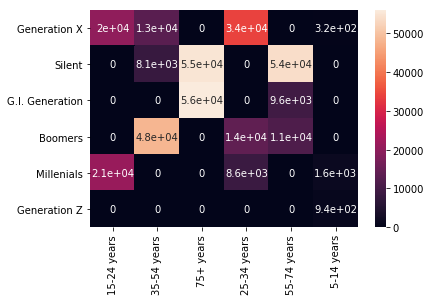

In [42]:
sns.heatmap(for_heatmap, annot=True)

более простой пример

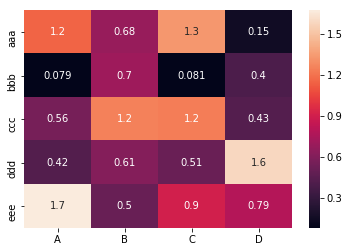

In [46]:
sns.heatmap(df, annot=True)

способ 2 - отдельно создавать все элементы

1. вначале выбрать какие у нас будут колонки и столбцы

In [47]:
columns = list("abcd")
columns

['a', 'b', 'c', 'd']

In [48]:
rows = [1,2,3,4,5]
rows

[1, 2, 3, 4, 5]

2. потом заполнить соответствующий двумерный массив (я его здесь заполню случайно)

In [50]:
for_heatmap = np.random.randn(5,4)
for_heatmap

array([[-1.22601363, -0.9013339 , -1.72769289,  0.1224527 ],
       [-0.26837097, -0.7597154 ,  0.03466396,  0.95659499],
       [ 0.86564671, -0.17199303, -0.8755115 , -1.14877227],
       [-0.14371581,  0.21782287,  1.23855912,  0.47247354],
       [-1.35044964,  0.90051562,  0.33330233, -1.58415189]])

3. рисуем

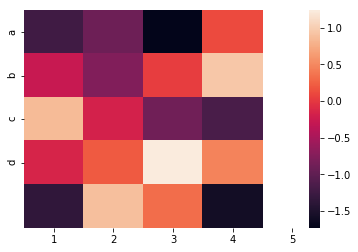

In [52]:
sns.heatmap(for_heatmap, xticklabels=rows, yticklabels=columns);

то же самое в виде датафрейма

In [53]:
idx= ['aaa','bbb','ccc','ddd','eee']
cols = list('ABCD')
df = pd.DataFrame(abs(np.random.randn(5,4)), index=idx, columns=cols)
df

,A,B,C,D
aaa,0.463019,0.426420,1.425965,0.243274
bbb,0.487343,0.231347,1.109627,0.071693
ccc,0.592622,1.600722,0.780987,0.167436
ddd,1.545728,0.301487,0.546949,1.682613
eee,0.250480,0.433194,0.990386,1.114276


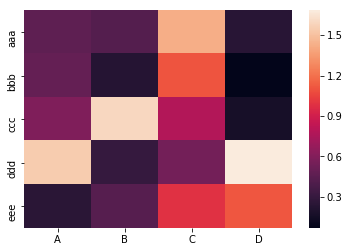

In [54]:
sns.heatmap(df)